<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Cryptocurrency/BTCusdt_Crypto_dataset_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/btcusdt-crypto-dataset-january10th2024-2025.zip'

Archive:  /content/btcusdt-crypto-dataset-january10th2024-2025.zip
  inflating: btc_usdt.csv            


In [ ]:
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import mode
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/btc_usdt.csv')
data.head()

,timestamp,open,high,low,close,volume
0,2024-01-10,46118.51,47701.27,44316.94,46648.59,2093.812510
1,2024-01-11,46647.21,49053.64,45592.95,46344.00,2371.983481
2,2024-01-12,46335.89,46512.76,41446.36,42777.97,2294.591816
3,2024-01-13,42775.36,43257.08,42443.26,42843.20,406.902987
4,2024-01-14,42833.23,43063.76,41723.69,41735.38,465.527323


In [ ]:
data.shape

(367, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  367 non-null    object 
 1   open       367 non-null    float64
 2   high       367 non-null    float64
 3   low        367 non-null    float64
 4   close      367 non-null    float64
 5   volume     367 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.3+ KB


In [ ]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
print(data["timestamp"])
print("Initial date:",data["timestamp"].min())
print("End date:",data["timestamp"].max())

0     2024-01-10
1     2024-01-11
2     2024-01-12
3     2024-01-13
4     2024-01-14
         ...    
362   2025-01-06
363   2025-01-07
364   2025-01-08
365   2025-01-09
366   2025-01-10
Name: timestamp, Length: 367, dtype: datetime64[ns]
Initial date: 2024-01-10 00:00:00
End date: 2025-01-10 00:00:00


In [ ]:
data.describe()

,timestamp,open,high,low,close,volume
count,367,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2024-07-11 00:00:00.000000256,67197.227302,68607.118420,65828.650763,67328.794169,632.620806
min,2024-01-10 00:00:00,39558.160000,40176.920000,38547.380000,39563.520000,52.527207
25%,2024-04-10 12:00:00,59434.530000,61287.265000,58413.790000,59462.495000,322.134544
50%,2024-07-11 00:00:00,64881.710000,66170.250000,63228.080000,64915.790000,543.763421
75%,2024-10-10 12:00:00,69475.385000,71009.950000,68361.960000,69505.090000,829.129322
max,2025-01-10 00:00:00,106129.980000,108367.110000,105333.930000,106137.670000,3644.918297
std,NaN,15069.193233,15381.740637,14762.396719,15094.400246,461.507437


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.date
print(data["timestamp"].head())

0    2024-01-10
1    2024-01-11
2    2024-01-12
3    2024-01-13
4    2024-01-14
Name: timestamp, dtype: object


In [ ]:
data["timestamp"] = data["timestamp"].astype(str)
data["date of year"] = data["timestamp"].str.split("-").str[0]
print(data["date of year"].unique())
data["timestamp"] = data["timestamp"].astype(str)
data["date of month"] = data["timestamp"].str.split("-").str[1]
print(data["date of month"].unique())

['2024' '2025']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


In [ ]:
data['date'] = pd.to_datetime(data['date of year'].astype(str) + '-' + data['date of month'].astype(str))
data['date'].head()

,date
0,2024-01-01
1,2024-01-01
2,2024-01-01
3,2024-01-01
4,2024-01-01


In [ ]:
data = data.sort_values(by='timestamp', ascending=True)

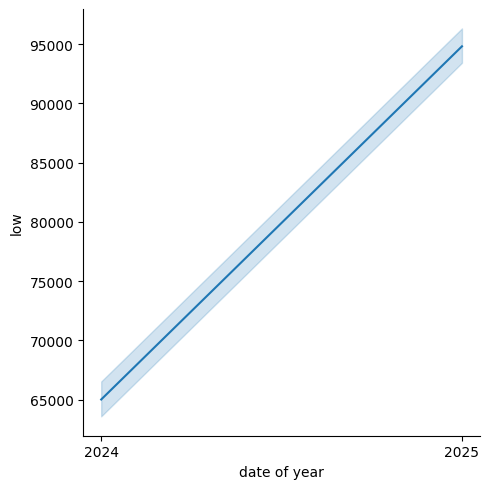

In [ ]:
sns.relplot(data=data[["low","date of year"]], x = "date of year",y = "low",kind = "line")
plt.show()

In [ ]:
data = data.sort_values(by='date of month')
fig = go.Figure(data=[go.Candlestick(x=data['date'],
                open=data['open'], high=data['high'],
                low=data['low'], close=data['close'])
                      ])
fig.show()

In [ ]:
data['date'] = pd.to_datetime(data['date'], unit='s')
data = data.sort_values(by='date')

In [ ]:
data_face = data[['date','close']]
print("Shape of close dataframe:", data_face.shape)

Shape of close dataframe: (367, 2)


In [ ]:
fig = px.line(data_face, x=data_face.date, y=data_face.close,labels={'date':'date','close':'price'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of close price 2020-2025', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])

In [27]:
def create_sequences(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -2])
    return np.array(X), np.array(y)


In [28]:
time_step = 3
X, y = create_sequences(scaled_data, time_step)

In [29]:
X

array([[[0.09854545, 0.11034358, 0.08638805, 0.10642374],
        [0.10648725, 0.13017591, 0.10549385, 0.10184854],
        [0.1018108 , 0.09291424, 0.04340664, 0.04828376]],

       [[0.10648725, 0.13017591, 0.10549385, 0.10184854],
        [0.1018108 , 0.09291424, 0.04340664, 0.04828376],
        [0.04832675, 0.04517013, 0.0583333 , 0.04926357]],

       [[0.1018108 , 0.09291424, 0.04340664, 0.04828376],
        [0.04832675, 0.04517013, 0.0583333 , 0.04926357],
        [0.04919604, 0.04233512, 0.04755913, 0.03262317]],

       ...,

       [[0.88185887, 0.85936232, 0.88324565, 0.88152248],
        [0.88187089, 0.86031671, 0.87925713, 0.8841663 ],
        [0.88514795, 0.91375886, 0.88904982, 0.94134871]],

       [[0.88187089, 0.86031671, 0.87925713, 0.8841663 ],
        [0.88514795, 0.91375886, 0.88904982, 0.94134871],
        [0.94156431, 0.91706637, 0.86255032, 0.86214935]],

       [[0.88514795, 0.91375886, 0.88904982, 0.94134871],
        [0.94156431, 0.91706637, 0.86255032, 0.86

In [30]:
y

array([0.04926357, 0.03262317, 0.04420439, 0.05412416, 0.04830373,
       0.02599387, 0.03151088, 0.03197728, 0.02999452, 0.        ,
       0.0051176 , 0.00777494, 0.00594705, 0.03392503, 0.03831953,
       0.03711651, 0.05602986, 0.05078503, 0.04533276, 0.05272737,
       0.05466131, 0.05187779, 0.0455785 , 0.04727616, 0.05292805,
       0.07201699, 0.0860415 , 0.11355699, 0.12298227, 0.13092724,
       0.15558216, 0.15241967, 0.18384328, 0.18519891, 0.18862652,
       0.18143424, 0.18845378, 0.18355052, 0.19088896, 0.18461685,
       0.17614449, 0.16793095, 0.18037151, 0.18268502, 0.22417275,
       0.26252201, 0.34366011, 0.32421743, 0.34279852, 0.33689578,
       0.35379528, 0.43096893, 0.36313809, 0.39821552, 0.40956738,
       0.42914224, 0.43216143, 0.44155637, 0.48869178, 0.47916331,
       0.50331668, 0.47805762, 0.44965366, 0.3872476 , 0.43313418,
       0.42127973, 0.33637696, 0.42476006, 0.38978462, 0.36388148,
       0.36741813, 0.41513681, 0.45555535, 0.45706044, 0.44940

In [31]:
X.shape

(363, 3, 4)

In [32]:
y.shape

(363,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting the close price

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=60, batch_size=32, verbose=1)

Epoch 1/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.1133 - val_loss: 0.3104
Epoch 2/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0363 - val_loss: 0.0625
Epoch 3/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 4/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077 - val_loss: 0.0479
Epoch 5/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - val_loss: 0.0599
Epoch 6/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 0.0298
Epoch 7/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037 - val_loss: 0.0192
Epoch 8/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - val_loss: 0.0250
Epoch 9/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033 - val_loss: 0.0186
Epoch 10/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0112
Epoch 11/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0027 - val_loss: 0.0148
Epoch 12/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0027 - val_loss: 0.0096
E

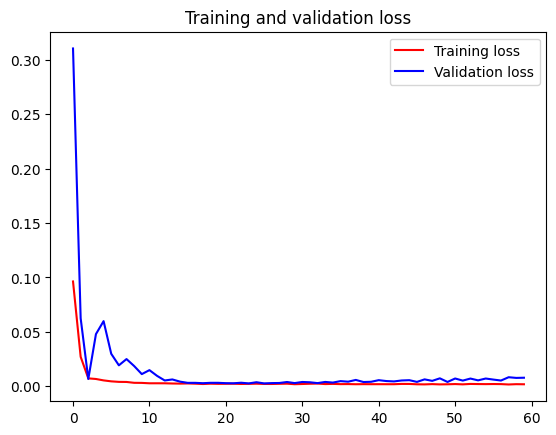

<Figure size 640x480 with 0 Axes>

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [35]:
X_test

array([[[0.34057143, 0.33775328, 0.34920265, 0.33958481],
        [0.33959008, 0.32803296, 0.32575616, 0.31651354],
        [0.31647926, 0.3106919 , 0.30518839, 0.31194075]],

       [[0.33959008, 0.32803296, 0.32575616, 0.31651354],
        [0.31647926, 0.3106919 , 0.30518839, 0.31194075],
        [0.31203218, 0.34091942, 0.32270899, 0.34471323]],

       [[0.31647926, 0.3106919 , 0.30518839, 0.31194075],
        [0.31203218, 0.34091942, 0.32270899, 0.34471323],
        [0.34518645, 0.34171426, 0.35862939, 0.35514175]],

       ...,

       [[0.88185887, 0.85936232, 0.88324565, 0.88152248],
        [0.88187089, 0.86031671, 0.87925713, 0.8841663 ],
        [0.88514795, 0.91375886, 0.88904982, 0.94134871]],

       [[0.88187089, 0.86031671, 0.87925713, 0.8841663 ],
        [0.88514795, 0.91375886, 0.88904982, 0.94134871],
        [0.94156431, 0.91706637, 0.86255032, 0.86214935]],

       [[0.88514795, 0.91375886, 0.88904982, 0.94134871],
        [0.94156431, 0.91706637, 0.86255032, 0.86

In [36]:
predicted_prices = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_prices)
mse = mean_squared_error(y_test, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_prices)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
Mean Absolute Error (MAE): 0.0738048980591126
Mean Squared Error (MSE): 0.007848646055976339
Root Mean Squared Error (RMSE): 0.08859258465569418
R-squared (R²): 0.8080979314331624


In [37]:
predicted_prices.shape

(91, 1)

In [38]:
predicted_prices_reshaped = predicted_prices.reshape(-1, 1)
X_last = X_test[:, -1, :-1]
predicted_prices_full = np.concatenate((X_last, predicted_prices_reshaped), axis=1)

In [39]:
last_known_values = scaled_data[-1, :-1]
dummy_other_features = np.tile(last_known_values, (predicted_prices.shape[0], 1))
predicted_prices_full = np.concatenate((dummy_other_features, predicted_prices), axis=1)
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices_full)[:, -1]

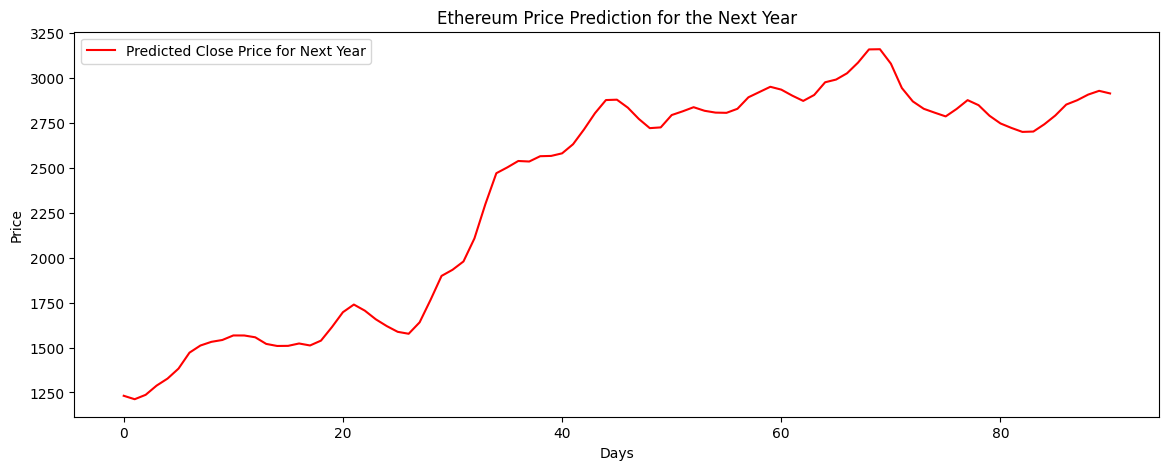

In [40]:
plt.figure(figsize=(14, 5))
plt.plot(predicted_prices_rescaled, color='red', label='Predicted Close Price for Next Year')
plt.title('Ethereum Price Prediction for the Next Year')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()